# Spectra acquisiton
Control both the stepping motor and the camera from this notebook.<br>
Make a loop to measure a wide-range spectrum automatically.

NOTE: only one connection to COM port is possible at a time. Shut down other connections, either in python or dedicated software.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from FLI import FLI
import numpy as np
import thr640
import time
import logging
import csv
import xarray as xr

In [5]:
# logger
logger = thr640.logger
logger.setLevel() # 10 - DEBUG 50 - CRITICAL 20 - INFO
camera = FLI()
step_motor = thr640.THR640()

In [4]:
#step_motor.goto(490000)
#step_motor.waitUntilReady()

In [8]:
%run imaging_tool.py

exposure = 1 * 1e3 # ms
vbin = 1
attributes = {
    "temperature": camera.getTemperature(),
    "device_status": camera.getDeviceStatus(),
    "exposure": exposure,
    "frame_type": "light",
}

for i in range(3):
    step_motor.goto(490000 + i*1000)
    step_motor.waitUntilReady()
    
    camera.setExposureTime(exposure)
    camera.setVBin(vbin)
    camera.setImageArea(10,0,2058,512//vbin)
    time.sleep(.5)
    camera.exposeFrame()
    time.sleep(.1)
    # load image
    image_data = camera.grabFrame(out=np.empty((512//vbin,2048), np.uint16))
    # convert to xarray
    data = xr.DataArray(
        image_data, dims=["y", "x"], coords={"image_counter": 0}, attrs=attributes
    )
    # save data as NetCDF file
    filepath = f'test{i}.nc'
    data.to_netcdf(filepath)

2020-08-21 21:20:54,400:INFO:getting status...
2020-08-21 21:21:01,280:INFO:Move to +490000
2020-08-21 21:21:01,394:INFO:getting status...
2020-08-21 21:21:07,436:INFO:getting status...
2020-08-21 21:21:18,537:INFO:getting status...
2020-08-21 21:21:25,437:INFO:Move to +491000
2020-08-21 21:21:25,538:INFO:getting status...
2020-08-21 21:21:31,594:INFO:getting status...
2020-08-21 21:21:42,679:INFO:getting status...
2020-08-21 21:21:49,547:INFO:Move to +492000
2020-08-21 21:21:49,650:INFO:getting status...
2020-08-21 21:21:55,689:INFO:getting status...


<Figure size 432x288 with 0 Axes>

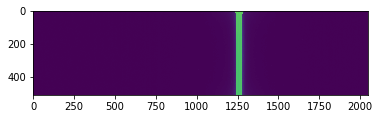

In [14]:
ds_disk = xr.open_dataset('test2.nc')
a = ds_disk.to_array()
imshow(a[0])